# **Red neuronal convolucional (CNN) para clasificar imágenes de perros y gatos**

**Proyectos de Ingeniería I - 2024**

Alumna:
Vega Pahuara, Millene Nadile


Las Redes Neuronales Convolucionales (CNN) son una tecnología de inteligencia artificial utilizada para analizar y clasificar imágenes.

En este caso se aplicará para la detección de imágenes de perros y gatos, convirtiendo las imagenes en una matriz de píxeles y usando filtros para identificar características importantes, como bordes o patrones y así poder tomar decisiones basadas en patrones detectados.

## **Dataset**
Utilizare el dataset de gatos y perros disponible en TensorFlow Datasets para simplificar el proceso.

https://www.tensorflow.org/datasets/catalog/cats_vs_dogs

In [1]:
!pip install -q tensorflow-datasets


## **Librerías**

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
import numpy as np


## **Preparar el dataset**

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)

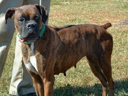
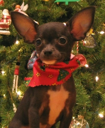
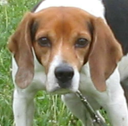
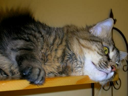

In [15]:

dataset, info = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)


tfds.as_dataframe(dataset['train'].take(4), info)


Convertiremos las imágenes en color a escala de grises, lo que reducirá la carga de procesamiento.

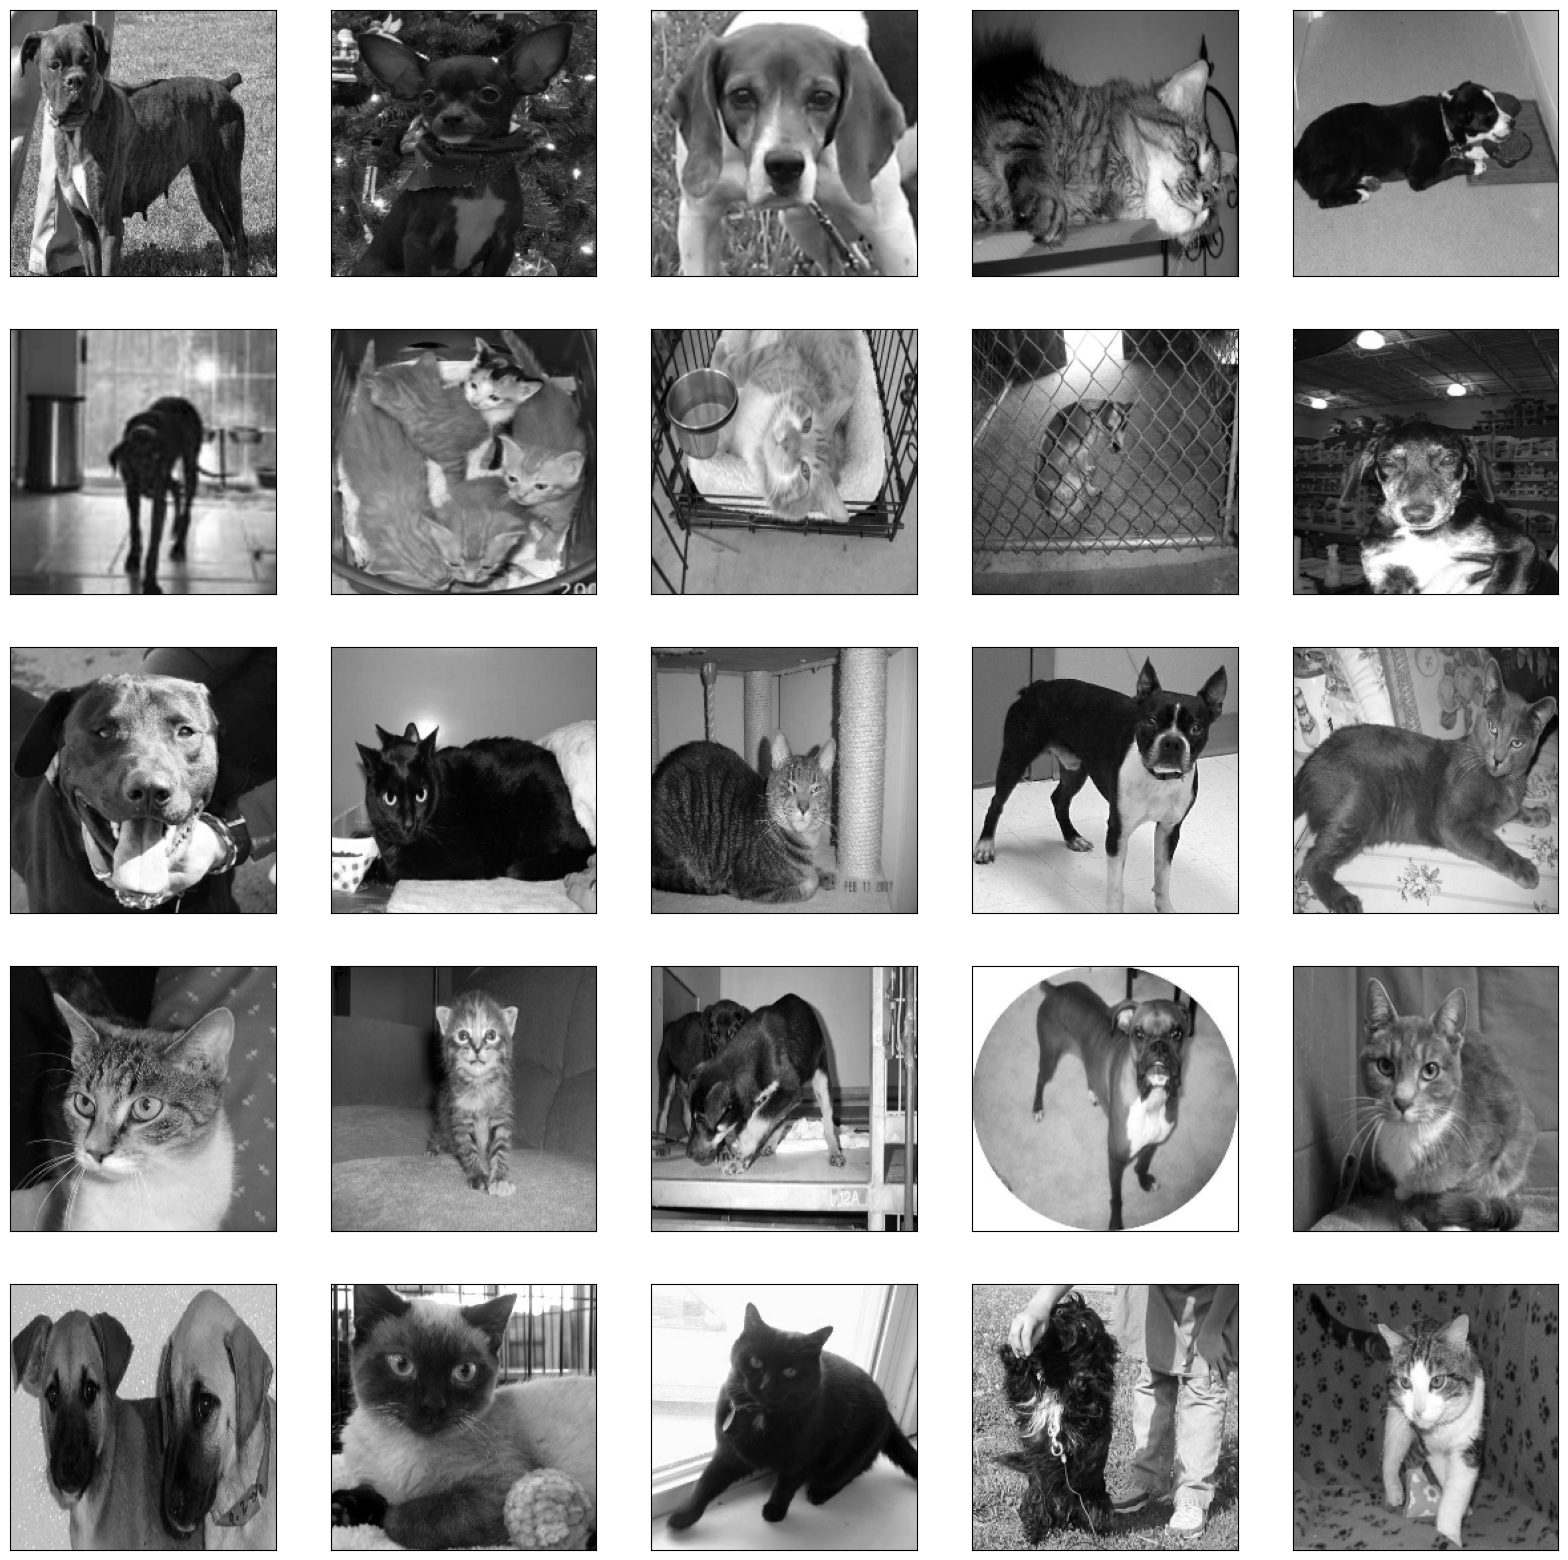

In [18]:
plt.figure(figsize=(20,20))

TAMANO_IMG=200

for i, (imagen, etiqueta) in enumerate(dataset['train'].take(25)):
    imagen=cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
    imagen=cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen, cmap='gray')

In [ ]:
datos_entrenamiento = []

In [ ]:
TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(dataset['train']):
    imagen=cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
    imagen=cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen= imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)
    dataset_entrenamiento.append([imagen, etiqueta])


In [ ]:
dataset_entrenamiento[0]

## **Red neuronal convolucional (CNN)**


In [13]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenar el modelo

In [ ]:

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)


146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8764 - loss: 0.4139
Precisión en el conjunto de validación: 0.87


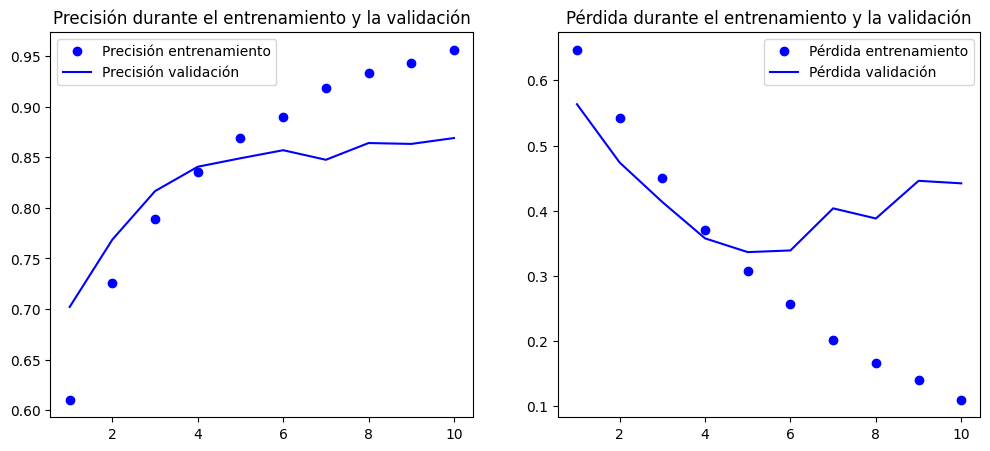

In [6]:

test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Precisión en el conjunto de validación: {test_acc:.2f}")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Precisión entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Pérdida entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()

plt.show()
